TASK-26A

Analysis on car dataset.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Getting the data
car = pd.read_csv('car.csv')

# EDA: Exploartory Data Analysis

In [ ]:
# Let's start with the head of the data
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# Also look at the tail of the car data
car.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [ ]:
# To see info of the data
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

First, year value is integer but should be date type to visualize data

In the data there are object types, integers and float values.


In [ ]:
# I will start with the converting year value to date type
pd.to_datetime(car['Year'])

0     1970-01-01
1     1970-01-01
2     1970-01-01
3     1970-01-01
4     1970-01-01
         ...    
401   1982-01-01
402   1982-01-01
403   1982-01-01
404   1982-01-01
405   1982-01-01
Name: Year, Length: 406, dtype: datetime64[ns]

In [ ]:
car['Engine Cylinders'].value_counts()

4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
Name: Engine Cylinders, dtype: int64

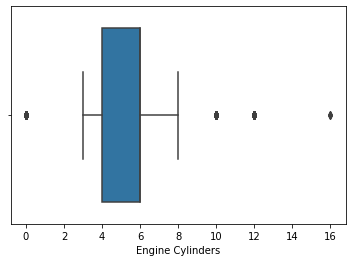

In [ ]:
sns.boxplot(x='Engine Cylinders',data=car) # to see outlier values

In [ ]:
car['Engine HP'].value_counts() # to see engine hp values, you can see via histogram also values spread mostly around the 200

200.0    456
170.0    351
210.0    320
240.0    268
285.0    246
        ... 
557.0      1
123.0      1
535.0      1
372.0      1
553.0      1
Name: Engine HP, Length: 356, dtype: int64

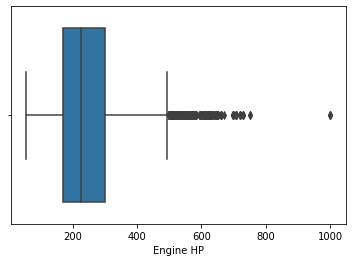

In [ ]:
sns.boxplot(x='Engine HP',data=car) # you can see outlier values easily via boxplot.

In [ ]:
car.Model.value_counts()

Silverado 1500                      156
Tundra                              140
F-150                               126
Sierra 1500                          90
Beetle Convertible                   89
                                   ... 
MKZ Hybrid                            1
Pulsar                                1
Continental GT Speed Convertible      1
RS 6                                  1
Sierra C3                             1
Name: Model, Length: 915, dtype: int64

In [ ]:
car['Number of Doors'].value_counts()

4.0    8353
2.0    3160
3.0     395
Name: Number of Doors, dtype: int64

In [ ]:
car['Transmission Type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission Type, dtype: int64

In [ ]:
car_years = car.Year.value_counts()
car_years

2015    2170
2016    2157
2017    1668
2014     589
2012     387
2009     379
2013     366
2008     349
2007     345
2010     298
2011     285
2003     238
2004     235
2005     213
1993     209
2002     205
2006     205
1992     177
1997     175
2001     168
1994     163
1998     154
1991     152
1995     135
1996     131
1990     123
1999     120
2000     118
Name: Year, dtype: int64

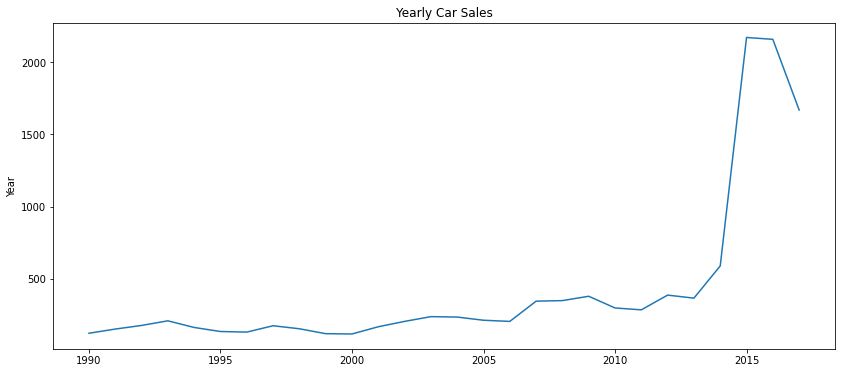

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Yearly Car Sales")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=car_years)


In [ ]:
car_corr = car.corr()
car_corr

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


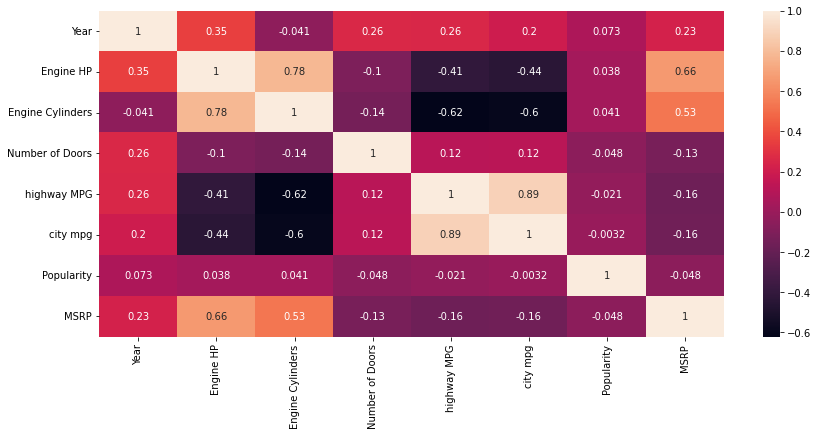

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(car_corr, annot=True)

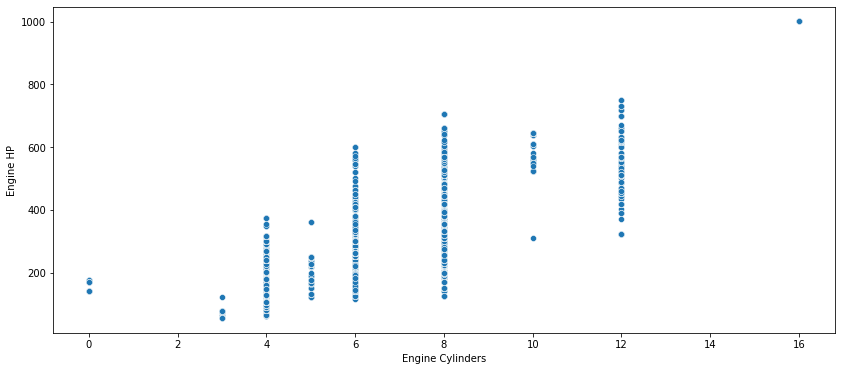

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=car['Engine Cylinders'], y=car['Engine HP'])

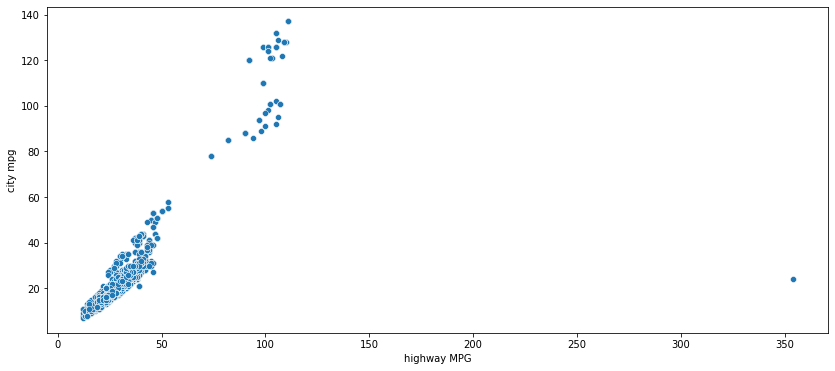

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=car['highway MPG'], y=car['city mpg'])

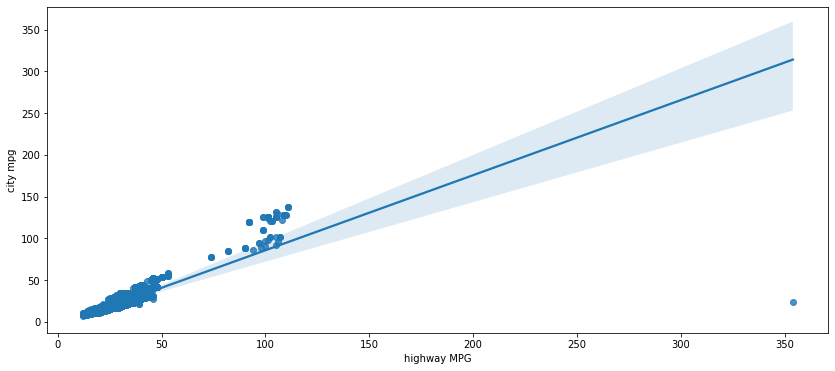

In [ ]:
plt.figure(figsize=(14,6))
sns.regplot(x=car['highway MPG'], y=car['city mpg'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


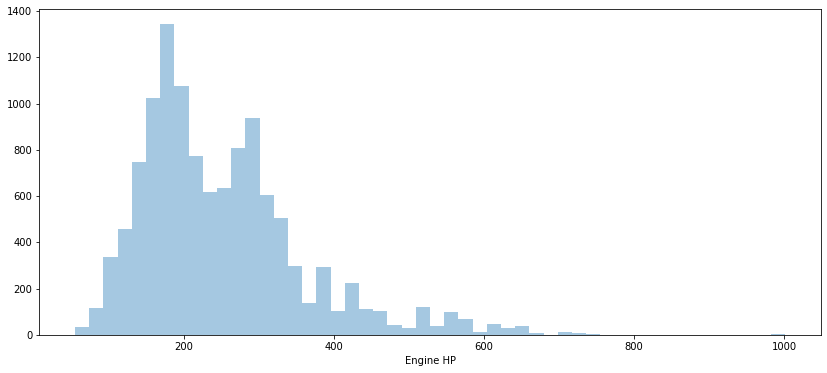

In [ ]:
# Histogram 
plt.figure(figsize=(14,6))
sns.distplot(a=car['Engine HP'], kde=False)

In [ ]:
car['Engine HP'].value_counts() # to see engine hp values, you can see via histogram also values spread mostly around the 200

200.0    456
170.0    351
210.0    320
240.0    268
285.0    246
        ... 
557.0      1
123.0      1
535.0      1
372.0      1
553.0      1
Name: Engine HP, Length: 356, dtype: int64

TASK-26B

 Please make use at least one of the new functions in V7 for the car dataset as you work in task-26A

In [ ]:

import altair as alt
from vega_datasets import data
cars = data.cars()
plt.figure(figsize=(14,10))
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()


alt.Chart(...)

<Figure size 1008x720 with 0 Axes>

# Seaborn Visualizations

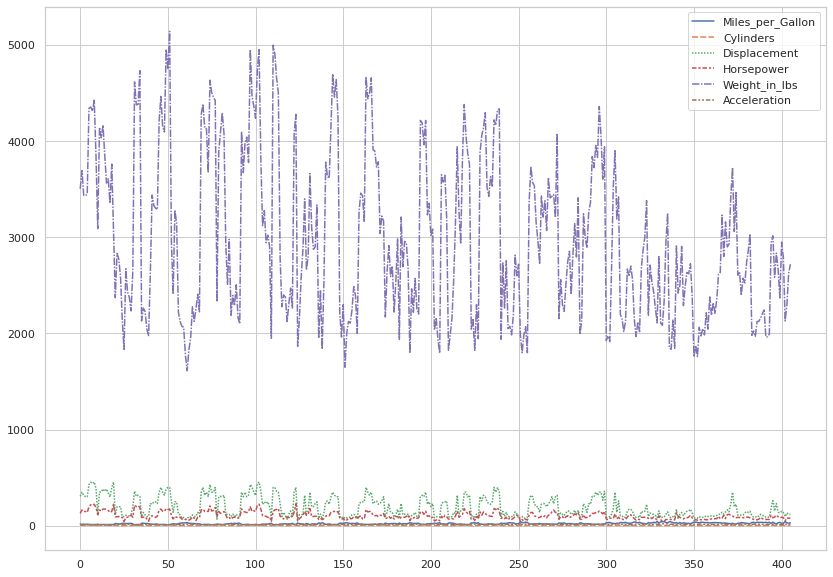

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,10))
sns.lineplot( data=car)

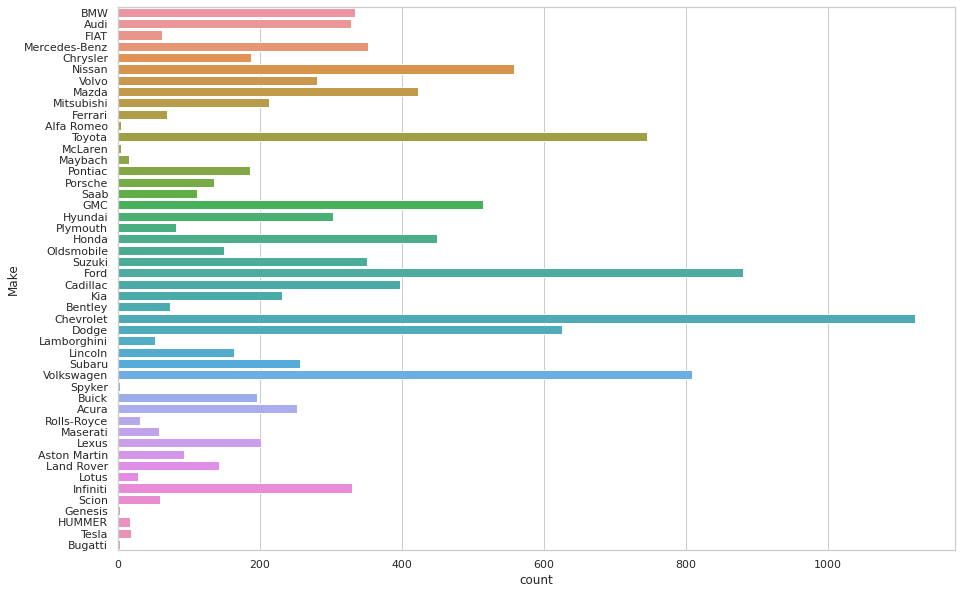

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y="Make", data=car)

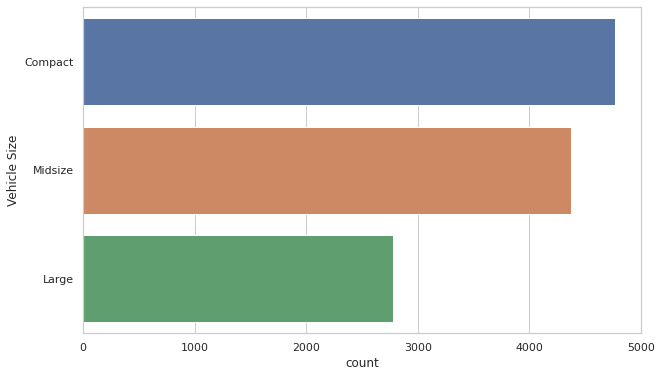

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y="Vehicle Size", data=car) # to see count of the vehicles

In [ ]:
car.groupby('Make').sum()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Make,,,,,,,,
Acura,506536,61689.0,1344.0,912.0,7084,5025,51408,8791672
Alfa Romeo,10077,1185.0,20.0,10.0,170,120,565,308000
Aston Martin,187211,45042.0,988.0,200.0,1757,1165,24087,18405665
Audi,660012,91084.0,1823.0,1138.0,9454,6424,1018440,17532293
BMW,672792,109187.0,1990.0,1056.0,9768,6927,1307944,20556619
Bentley,148866,39505.0,720.0,198.0,1399,855,38480,18290530
Bugatti,6025,3003.0,48.0,6.0,42,24,2460,5271671
Buick,393961,42972.0,1042.0,752.0,5282,3666,30380,5528496
Cadillac,799221,131927.0,2554.0,1430.0,10019,6890,644728,22323833
